In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [3]:
data = w.wsd('881001.WI', 'close', '2010-01-01', '2019-03-19')

In [4]:
pdf = pd.DataFrame(data.Data[0], columns=['881001.WI'], index=data.Times)
pdf.index = pd.to_datetime(pdf.index)

In [5]:
st_li = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/amihud_liquidity.xlsx')

In [9]:
st_li.head()

,sz50_amihud,sz50_corwin and schultz,sz50_wu,sz_roll,wdqa_amihud,wdqa_wu,wdqa_corwin and schultz,wdqa_roll,hs300_amihud,hs300_wu,...,zz800_roll,zxb_amihud,zxb_wu,zxb_corwin and schultz,zxb_roll,cyb_amihud,cyb_wu,cyb_corwin and schultz,cyb_roll,z
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001898,0.005385,0.959819,NaN,0.005953,0.463989,0.002104,NaN,0.007168,0.673340,...,NaN,0.032020,0.219753,0.004059,NaN,0.026698,0.542847,0.003378,NaN,NaN
2010-01-06,0.002193,0.008765,0.917434,NaN,0.005170,0.385900,0.001064,NaN,0.005690,0.603124,...,NaN,0.055633,0.369212,0.007448,NaN,0.013317,0.479921,0.003749,NaN,NaN
2010-01-07,0.003208,0.010504,1.334364,NaN,0.010233,0.766992,0.005848,NaN,0.008834,0.974189,...,NaN,0.060979,0.396245,0.019613,NaN,0.026294,0.807358,0.001301,NaN,NaN
2010-01-08,0.001882,0.005411,0.784162,NaN,0.007606,0.543209,0.000344,NaN,0.005580,0.632860,...,NaN,0.058611,0.427211,0.030784,NaN,0.017996,0.498507,0.006615,NaN,NaN


In [10]:
st_li['z'] = st_li['wdqa_amihud'].rolling(243).apply(lambda x: (x[-1] - x.mean()) / x.std())

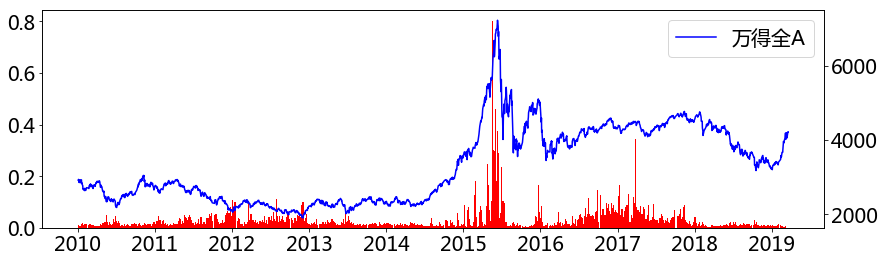

In [14]:
fig = plt.figure(figsize=(14, 4))
ax = fig.add_subplot(1, 1, 1)
ax.bar(st_li.index, st_li['wdqa_amihud'].abs(), color='red', width=5)
axx = ax.twinx()
axx.plot(pdf.index, pdf['881001.WI'], label=u'万得全A', color='blue')
axx.legend(loc='upper right', fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
axx.yaxis.set_tick_params(labelsize=20)